If you're not familiar with any Stack Exchange website, take the time to explore one of them. Try to answer a few of these questions in a markdown cell:

What kind of questions are welcome on this site?

Questions related to Data Science, mathematics, physics, philosophy are welcome

What, other than questions, does the site's home subdivide into?

Questions on Technology, Life & Arts, Culture/Recreation, Science and others

Does any of them look useful towards our goal?

Yes, since there is diverse range of topics in stackexchange, it'll be useful towards getting answers to the unanswered questions in these subjects.

What information is available in each post?

Information related to questions asked in the forum on main stream subjects like Data Science, mathematics, physics, philosophy and also other subjects like Technology, Life & Arts, Culture/Recreation, Science and others.

Explore some of the questions that were asked.

Try asking a couple of questions on any of Stack Exchange sites to get a better feel for how the sites operate.

Explore Data Science Stack Exchange's data model.

Investigate a few of the tables, especially those whose names sound more promising;

Write a few queries to get a feel for the data;

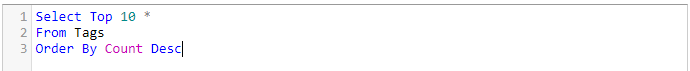

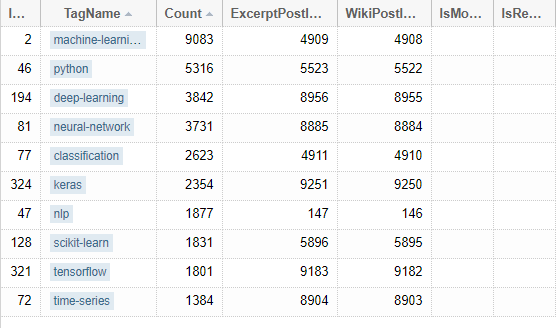

In a markdown cell, write about what tables look more promising towards finding the most popular content.

With the exploratory queries, we can focus our efforts on the Posts table. 

Run a query against the SEDE DSSE database that extracts the columns listed above for all the questions in 2019.

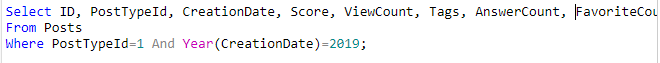

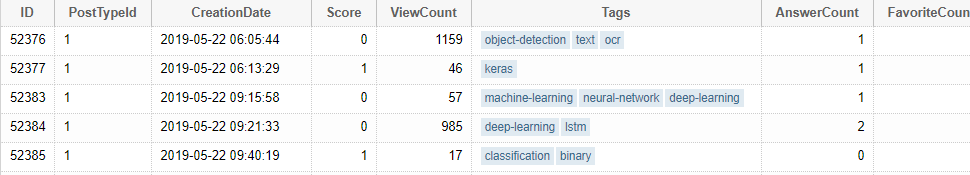

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [312]:
# Read in the file into a dataframe.

questions_2019 = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])
questions_2019.head()

,ID,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,52376,1,2019-05-22 06:05:44,0,1159,<object-detection><text><ocr>,1,NaN
1,52377,1,2019-05-22 06:13:29,1,46,<keras>,1,NaN
2,52383,1,2019-05-22 09:15:58,0,57,<machine-learning><neural-network><deep-learning>,1,NaN
3,52384,1,2019-05-22 09:21:33,0,985,<deep-learning><lstm>,2,NaN
4,52385,1,2019-05-22 09:40:19,1,17,<classification><binary>,0,NaN


In [313]:
# Explore the data. Try to answer a few of these questions in a markdown cell:

questions_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6776 entries, 0 to 6775
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             6776 non-null   int64         
 1   PostTypeId     6776 non-null   int64         
 2   CreationDate   6776 non-null   datetime64[ns]
 3   Score          6776 non-null   int64         
 4   ViewCount      6776 non-null   int64         
 5   Tags           6776 non-null   object        
 6   AnswerCount    6776 non-null   int64         
 7   FavoriteCount  1643 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 423.6+ KB


How many missing values are there in each column?

We can see missing values for 'FavoriteCount' column

Can we fix the missing values somehow?

We can fill the missing values for FavoriteCount column with zero and change type as float

Are the types of each column adequate?

The types seem adequate for each column

What can we do about the Tags column?

We can explore what type the questions_2019['Tags'] are

In [314]:
questions_2019['Tags'].apply(lambda x: type(x)).unique()

array([<class 'str'>], dtype=object)

We can see that the class is str type. On stackexchange there can be a maximum of five tags 

https://meta.stackexchange.com/questions/18878/how-do-i-correctly-tag-my-questions/18879#18879 

We can create 5 columns called Tag1, Tag2, Tag3, Tag4, and Tag5 and populate columns with tags in each row.

In [315]:
# Fill in the missing values with 0.

questions_2019.fillna(value={'FavoriteCount':0},inplace=True)

# Set the types of each column in accordance to what was illustrated above.

questions_2019['FavoriteCount'] = questions_2019['FavoriteCount'].astype(np.int64)
questions_2019.dtypes

ID                        int64
PostTypeId                int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

In [316]:
# Clean the Tags column and assign it back to itself:
# Use the process illustrated above.
# Assign the result to questions["Tags"].

questions_2019['Tags'] = questions_2019['Tags'].str.replace('^<|>$', '').str.split('><')
questions_2019.sample(3)

,ID,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
848,53641,1,2019-06-12 14:11:20,3,191,"[machine-learning, python, time-series]",2,0
6493,49123,1,2019-04-11 13:01:27,0,406,"[python, pandas, dataframe]",1,0
5960,47482,1,2019-03-16 12:32:48,3,1008,"[python, tensorflow]",1,0


In [317]:
# Count how many times each tag was used.

tag_count = dict()

for tags in questions_2019['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag]+=1
        else:
            tag_count[tag]=1

For improved aesthetics transform tag_count in a dataframe

In [318]:
# Count how many times each tag was viewed.

tag_count = pd.DataFrame.from_dict(tag_count,orient='index')
tag_count.rename(columns={0:'Count'},inplace=True)
tag_count.head(10)

,Count
object-detection,69
text,30
ocr,18
keras,706
machine-learning,2135
neural-network,820
deep-learning,896
lstm,290
classification,579
binary,20


<AxesSubplot:>

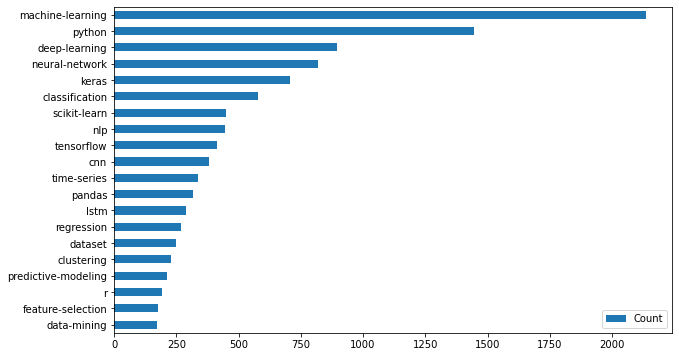

In [319]:
# Create visualizations for the top tags of each of the above results.

most_used = tag_count.sort_values(by='Count').tail(20)
most_used.plot(kind='barh',figsize=(10,6))

Let's repeat the same process for views

In [320]:
tag_view_count = dict()

for index, row in questions_2019.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']

<AxesSubplot:>

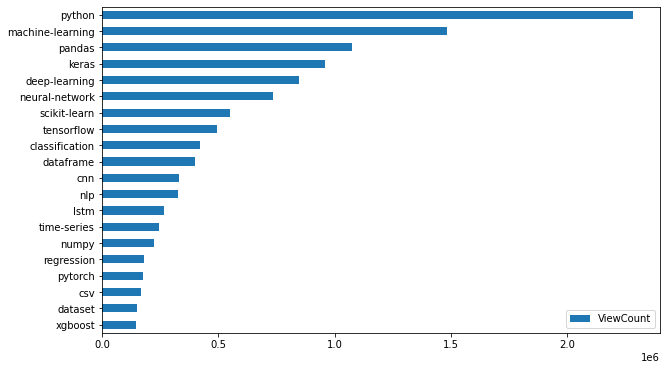

In [321]:
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient='index')
tag_view_count.rename(columns={0:'ViewCount'},inplace=True)
tag_view_count.head(10)


most_viewed = tag_view_count.sort_values(by='ViewCount').tail(20)
most_viewed.plot(kind='barh',figsize=(10,6))

Side by Side view

array([<AxesSubplot:title={'center':'ViewCount'}>], dtype=object)

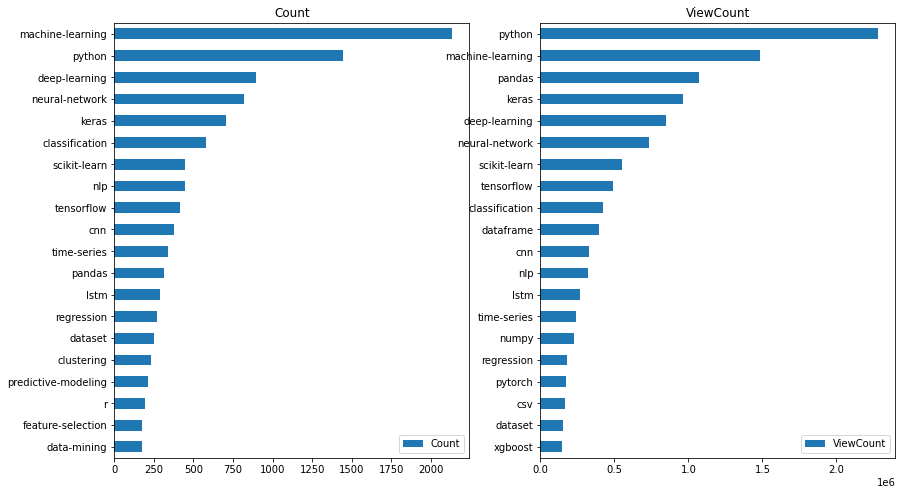

In [322]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((14,8))
most_used.plot(kind='barh',ax=axes[0],subplots=True)
most_viewed.plot(kind='barh',ax=axes[1],subplots=True)

In [323]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

The goal of this exercise is to make you think about technical solutions to determining how tags are related. We haven't covered any techniques to deal with this yet, so don't worry if nothing comes to mind.

In [324]:
# Brainstorm some ways in which you could find relationships between pair of tags.
# Brainstorm some ways in which you could find relationships between multiple tags.

all_tags = list(tag_count.index)

In [325]:
associations = pd.DataFrame(index=all_tags,columns=all_tags)
associations.iloc[0:2,0:2]

,object-detection,text
object-detection,NaN,NaN
text,NaN,NaN


We will now fill this dataframe with zeroes and then, for each lists of tags in questions["Tags"], we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [326]:
associations.fillna(0, inplace=True)

for tags in questions_2019['Tags']:
    associations.loc[tags,tags]+=1

In [327]:
associations.head()

,object-detection,text,ocr,keras,machine-learning,neural-network,deep-learning,lstm,classification,binary,...,.net,partial-least-squares,activity-recognition,aws-lambda,f1score,isolation-forest,domain-adaptation,indexing,mean-shift,fuzzy-classification
object-detection,69,2,2,13,16,5,20,1,5,0,...,0,0,1,0,0,0,0,0,0,0
text,2,30,1,2,3,1,3,0,9,1,...,0,0,0,0,0,0,0,0,0,0
ocr,2,1,18,0,4,1,4,1,2,0,...,0,0,0,0,0,0,0,0,0,0
keras,13,2,0,706,146,191,198,97,48,1,...,0,0,0,0,0,0,0,0,0,0
machine-learning,16,3,4,146,2135,290,326,43,222,3,...,1,0,1,0,1,0,1,0,0,0


In [328]:
# Do you know what each of these or most of these tags means? Could there be strong relations between them?

# Take a look at the tags page on DSSE. Try to answer the questions above. Do additional research on the internet as needed.

relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('',index=x.index, columns=x.columns)
    helper_df.loc['classification', 'deep-learning'] = 'background-color: yellow'
    helper_df.loc['deep-learning', 'classification'] = 'background-color: yellow'
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
        
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,data-mining,feature-selection,r,predictive-modeling,clustering,dataset,regression,lstm,pandas,time-series,cnn,tensorflow,nlp,scikit-learn,classification,keras,neural-network,deep-learning,python,machine-learning
data-mining,173,13,8,23,1,22,3,1,8,6,2,0,6,2,18,1,4,20,22,85
feature-selection,13,175,5,16,3,4,10,1,2,6,1,0,4,19,17,1,7,18,23,81
r,8,5,193,11,16,5,7,3,1,18,1,1,2,1,8,8,6,4,19,48
predictive-modeling,23,16,11,213,0,5,23,7,4,24,5,3,1,11,24,9,8,23,30,100
clustering,1,3,16,0,230,5,1,3,5,19,0,0,12,22,10,0,4,2,42,52
dataset,22,4,5,5,5,250,4,5,9,3,8,7,10,6,21,8,17,22,41,79
regression,3,10,7,23,1,4,270,10,6,19,4,6,2,33,29,25,40,19,51,100
lstm,1,1,3,7,3,5,10,290,6,60,18,26,20,1,13,97,49,73,43,43
pandas,8,2,1,4,5,9,6,6,315,16,1,2,4,31,3,2,1,1,218,57
time-series,6,6,18,24,19,3,19,60,16,337,7,7,0,7,19,34,25,30,77,106


In [329]:
# Visualization using a heat map

import warnings
warnings.filterwarnings(action='ignore')

for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

<AxesSubplot:>

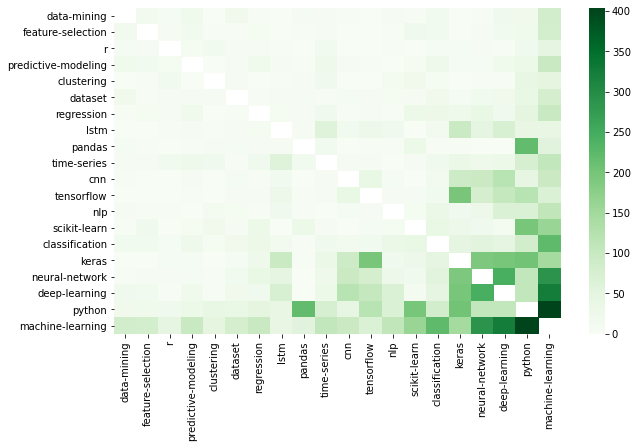

In [330]:
plt.figure(figsize=(10,6))
sns.heatmap(relations_most_used,cmap='Greens',annot=False)

The cells highlighted in yellow shows that deep-learning was used with classification 50 times. Values in blue tell how many times each of the tags was used.

In the bottom right, the strongest relationships in dark color for the most used tags. These tags get used a lot because of being together most cases with no relationship at all.

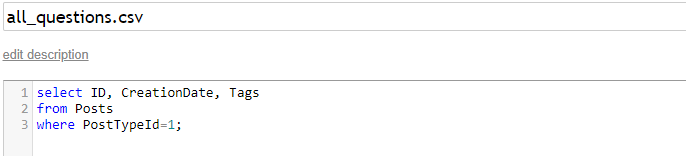

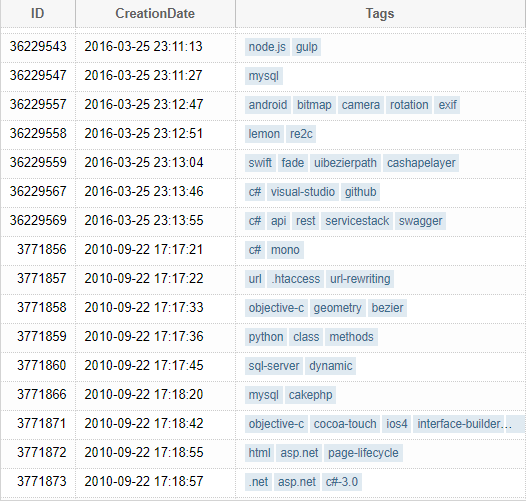

In [331]:
# Read the file all_questions.csv into a dataframe.

allq = pd.read_csv('all_questions.csv',parse_dates=['CreationDate'])
allq.head()

,ID,CreationDate,Tags
0,19412852,2013-10-16 20:09:49,<c#><.net><web-services><soap>
1,19412853,2013-10-16 20:09:51,<monodevelop><gtk#>
2,19412855,2013-10-16 20:09:57,<google-app-engine><maven><exception><gwt>
3,19412860,2013-10-16 20:10:09,<javascript><jquery><arrays><foreach><each>
4,19412864,2013-10-16 20:10:18,<android><android-intent><android-twitter>


In [332]:
allq['Tags'].apply(lambda x: type(x)).unique()

array([<class 'str'>], dtype=object)

In [333]:
# Transform the tags column in a similar manner to what was previously done.

allq['Tags'] = allq['Tags'].str.replace('^<|>$', '').str.split('><')

In [334]:
most_used

,Count
data-mining,173
feature-selection,175
r,193
predictive-modeling,213
clustering,230
dataset,250
regression,270
lstm,290
pandas,315
time-series,337


Think about what questions should be classified as deep learning questions and the implement that definition.

The following list of tags belong to deep learning questions ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

We'll create a function to identify deep learning tags

In [396]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "machine-learning", "tensorflow", "keras", "neural-network", "deep-learning"]:
            return 1
        else:
            return 0

In [397]:
allq['DeepLearning'] = allq['Tags'].apply(class_deep_learning)

In [398]:
allq.sample(5)

,ID,CreationDate,Tags,DeepLearning,Quarter
41046,3254408,2010-07-15 09:52:51,[iphone],0,2010Q3
35431,36168909,2016-03-23 02:45:57,"[angularjs, angular-ui-router]",0,2016Q1
41443,3253996,2010-07-15 08:58:08,[iphone],0,2010Q3
48536,52711546,2018-10-08 23:57:16,"[xml, scala]",0,2018Q4
35628,3238474,2010-07-13 15:00:18,"[function, scala, pointers]",0,2010Q3


We don't have all the data for the 1st quarter of 2020 and we'll get rid of those dates.

In [399]:
allq[allq['CreationDate'].dt.year < 2020]

,ID,CreationDate,Tags,DeepLearning,Quarter
0,19412852,2013-10-16 20:09:49,"[c#, .net, web-services, soap]",0,2013Q4
1,19412853,2013-10-16 20:09:51,"[monodevelop, gtk#]",0,2013Q4
2,19412855,2013-10-16 20:09:57,"[google-app-engine, maven, exception, gwt]",0,2013Q4
3,19412860,2013-10-16 20:10:09,"[javascript, jquery, arrays, foreach, each]",0,2013Q4
4,19412864,2013-10-16 20:10:18,"[android, android-intent, android-twitter]",0,2013Q4
...,...,...,...,...,...
49995,44724434,2017-06-23 14:56:06,"[javascript, jquery, html, css]",0,2017Q2
49996,44724436,2017-06-23 14:56:11,[javascript],0,2017Q2
49997,44724437,2017-06-23 14:56:11,"[postgresql, connection, role]",0,2017Q2
49998,44724442,2017-06-23 14:56:41,"[ajax, coldfusion, cfml, cfajaxproxy]",0,2017Q2


Let's create a column that identifies the quarter in which a question was asked.

In [400]:
def fetch_quarter(datetime):
    year = str(datetime.year)
    quarter = str(((datetime.month-1) // 3) + 1)
    return '{y}Q{q}'.format(y=year, q=quarter)

allq['Quarter'] = allq['CreationDate'].apply(fetch_quarter)

In [401]:
allq.head()

,ID,CreationDate,Tags,DeepLearning,Quarter
0,19412852,2013-10-16 20:09:49,"[c#, .net, web-services, soap]",0,2013Q4
1,19412853,2013-10-16 20:09:51,"[monodevelop, gtk#]",0,2013Q4
2,19412855,2013-10-16 20:09:57,"[google-app-engine, maven, exception, gwt]",0,2013Q4
3,19412860,2013-10-16 20:10:09,"[javascript, jquery, arrays, foreach, each]",0,2013Q4
4,19412864,2013-10-16 20:10:18,"[android, android-intent, android-twitter]",0,2013Q4


In [404]:
# Decide on an adequate timeframe and track interest in deep learning across that timeframe:
# Count how many deep learning questions are asked per time period.
# The total amount of questions per time period.
# How many deep learning questions there are relative to the total amount of questions per time period;

quarterly = allq.groupby('Quarter').agg({'DeepLearning':['sum','size']})
quarterly.columns=['DeepLearningQuestions','TotalQuestions']
quarterly['DeepLearningRate'] = quarterly['DeepLearningQuestions']/quarterly['TotalQuestions']

quarterly.reset_index(inplace=True)

<AxesSubplot:xlabel='Quarter'>

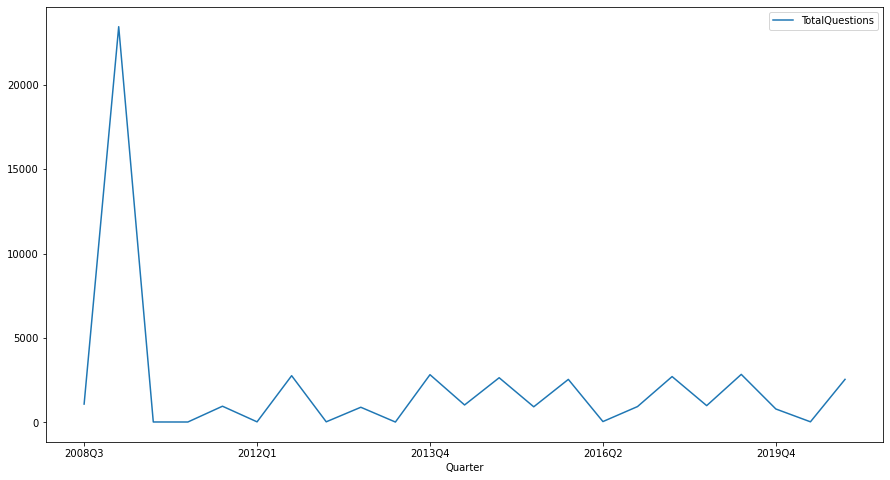

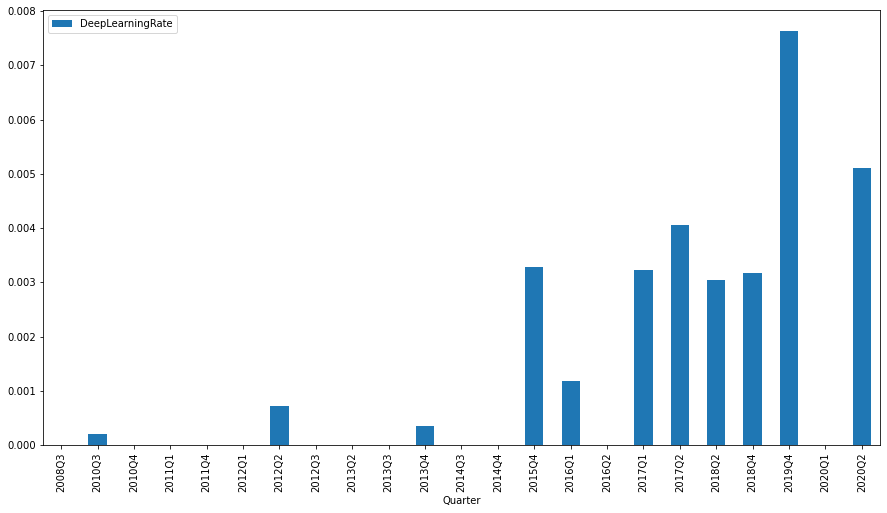

In [406]:
# Write your observations and final recommendation in a markdown cell.

quarterly.plot(kind='line', x='Quarter', y='TotalQuestions', figsize=(15,8))
quarterly.plot(kind='bar', x='Quarter', y='DeepLearningRate', figsize=(15,8))

From the graph it can be interpreted that there has been a high growth rate in deep learning trends in the recent 5 years when compared to the beginning. Thus it can be shown that the site stack exchange creates deep learning content.